<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Netflix-subscription-fee:-visualisation" data-toc-modified-id="Netflix-subscription-fee:-visualisation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Netflix subscription fee: visualisation</a></span><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Preparation" data-toc-modified-id="Preparation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#INFO" data-toc-modified-id="INFO-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>INFO</a></span></li><li><span><a href="#Subscription-fee" data-toc-modified-id="Subscription-fee-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Subscription fee</a></span></li><li><span><a href="#Library-size" data-toc-modified-id="Library-size-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Library size</a></span></li><li><span><a href="#Correlation-between-subscription-fee-and-GDP" data-toc-modified-id="Correlation-between-subscription-fee-and-GDP-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Correlation between subscription fee and GDP</a></span></li><li><span><a href="#Cost-per-title" data-toc-modified-id="Cost-per-title-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Cost per title</a></span><ul class="toc-item"><li><span><a href="#The-10-most-cost-effective-countries:" data-toc-modified-id="The-10-most-cost-effective-countries:-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>The 10 most cost-effective countries:</a></span></li><li><span><a href="#The-10-least-cost-effective-countries:" data-toc-modified-id="The-10-least-cost-effective-countries:-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>The 10 least cost-effective countries:</a></span></li></ul></li></ul></li></ul></div>

# Netflix subscription fee: visualisation 

Data contains Netflix monthly subscription fees in different countries from https://www.kaggle.com/prasertk/netflix-subscription-price-in-different-countries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Import data

In [5]:
data = pd.read_csv('/Users/irinasaahmetova/Downloads/archive/subscription_fee.csv')

In [6]:
data.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


## Preparation

In [7]:
data.shape

(65, 8)

In [8]:
# Search for missing data
data.isnull().sum()

Country_code                     0
Country                          0
Total Library Size               0
No. of TV Shows                  0
No. of Movies                    0
Cost Per Month - Basic ($)       0
Cost Per Month - Standard ($)    0
Cost Per Month - Premium ($)     0
dtype: int64

In [9]:
data.describe(include = 'object')


,Country_code,Country
count,65,65
unique,65,65
top,ar,Argentina
freq,1,1


In [10]:
data.duplicated().sum()

0

In [11]:
data.columns

Index(['Country_code', 'Country', 'Total Library Size', 'No. of TV Shows',
       'No. of Movies', 'Cost Per Month - Basic ($)',
       'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)'],
      dtype='object')

In [12]:
# Rename the columns
data.columns = ['country_code', 'country', 'library_size', 'number_of_tv_shows', 'number_of_movies', 'cost_basic', 'cost_standart', 'cost_premium']



As we can see: there's no missing or duplicated data. I think we can start 

---

## INFO

 - **country_code -** country code
 - **country -** name of a country
 - **library_size-** total library size (TV shows + Movies)
 - **number_of_tv_shows -** number of TV shows
 - **number_of_movies -** number of movies
 - **cost_basic -** basic subscription fee per month (USD)
 - **cost_standart -** standard subscription fee per month (USD)
 - **cost_premium -** premium subscription fee per month (USD)
 
 ---

## Subscription fee

Find the mean values:

In [13]:
premium_mean = data['cost_premium'].mean()
standart_mean = data['cost_standart'].mean()
basic_mean = data['cost_basic'].mean()

In [14]:
premium_mean

15.612923076923078

In [15]:
standart_mean

11.989999999999998

In [16]:
basic_mean

8.368461538461535

Find the mean value for every cauntry among all subscription plans:

In [17]:
data['mean_for_all_plans'] = (data['cost_basic'] + data['cost_standart'] + data['cost_premium']) / 3

In [18]:
# Function for making plots:
def make_barplot(data):
    
    
    # Make a list of pairs(subsciption type, color)
    fee_color = np.array([['cost_premium', 'yellow'], ['cost_standart', 'orange'], ['cost_basic', 'r']]) 
    
    
    for fee, color in fee_color:
        sns.barplot(
            x=fee,
            y='country',
            data = data,
            label = fee,
            color = color
        )
        
    plt.legend()
    plt.title('Subscription fee in different countries')
    plt.xlabel('USD')
    plt.ylabel('Country')

    # Add the lines of mean values    
    plt.axvline(x=premium_mean,  color='b', linestyle=':')
    plt.axvline(x=standart_mean,  color='b', linestyle=':')
    plt.axvline(x=basic_mean,  color='b', linestyle=':')    
    


Now I will make a plot that will show costs of the plans for all countries from the list. I also add vertical lines that display the mean values for each plan.

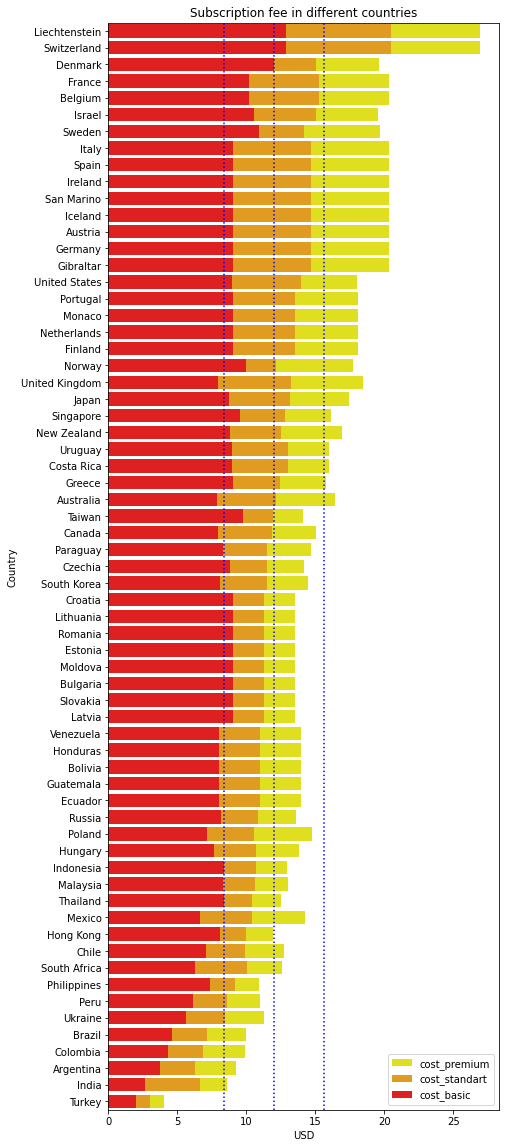

In [19]:
# Sort data by mean value of all plans' costs
sort_data = data.sort_values(by='mean_for_all_plans', ascending=False)

# Make plot for all countries
plt.figure(figsize=(7, 20))
make_barplot(sort_data)



The full list of countries is kind of hard to read, let's explore top-10 countries:

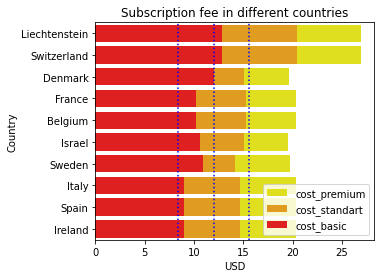

In [20]:
top_10 = sort_data.head(10)

plt.figure(figsize=(5, 4))
make_barplot(top_10)

 - The top countries by subscription fee are in Europe. 
 - Basic fee is at least 9 dollars and it's higher than mean value. 
 - Standart fee is around 15 dollars and it's higher than mean values for about 4-5 dollars.
 - Premium fee is almost 20 dollars for most of the countries from the list.
 - Liechtenstein and Switzerland are price leaders.
 

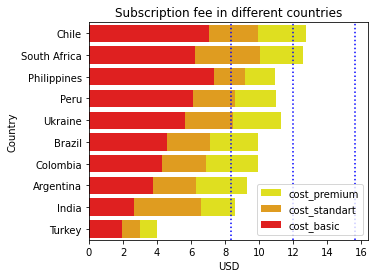

In [21]:
bottom_10 = sort_data.tail(10)

plt.figure(figsize=(5, 4))
make_barplot(bottom_10)

 - All these countries are either in Sounth America or Asia. Except for Ukraine(tbh it's a big surprise)
 - Standart fee in these countries are near the mean value of Basic fee 
 - Premium fee for most of the countries is lower than mean Standart fee
 - Premium fee for Turkey is 2 times lower than mean Basic plan fee.
 

 
 ---

## Library size

Check rating of countries by library size:

<AxesSubplot:xlabel='country'>

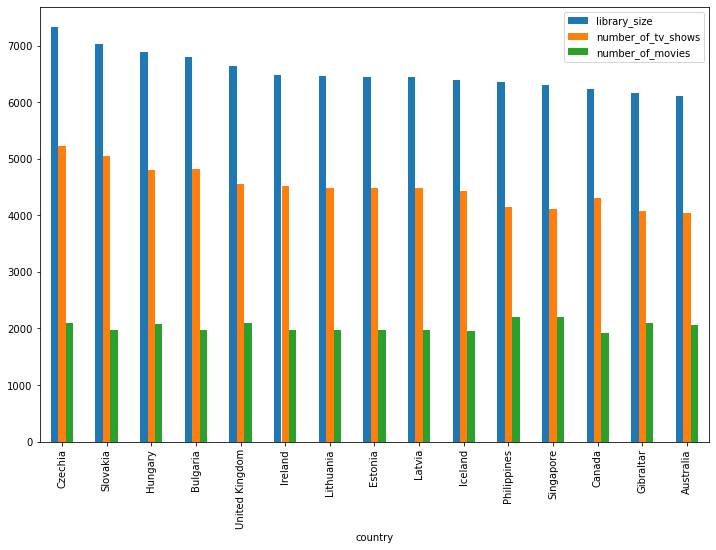

In [22]:
sort_by_library = data.sort_values(by='library_size', ascending = False)


# Making a plot of top-15 countries by library-size
sort_by_library.head(15).plot(
    x = 'country',
    y = ['library_size', 'number_of_tv_shows', 'number_of_movies'],
    kind = 'bar',
    figsize = (12, 8)
)



Regardless of the subscription price such countries as Liechtenstein, Switzerland or Denmark are not in this list. I assume that there isn't a strong correlation between the size of a library and subscription cost. 

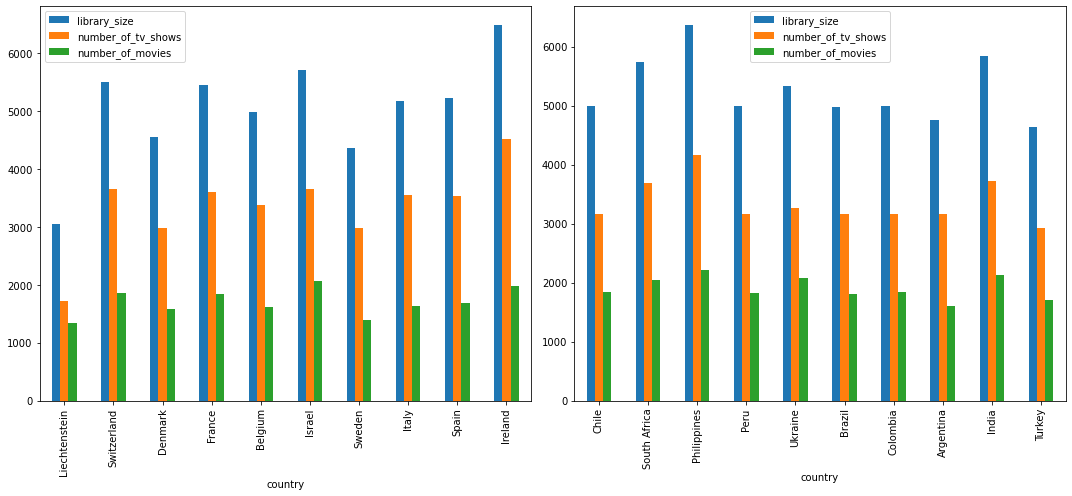

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15,7))

# Top-10 countries by the highest subscription fee
top_10.plot(
    x = 'country', 
    y = ['library_size', 'number_of_tv_shows', 'number_of_movies'],
    kind = 'bar' ,
    ax = axes[0]
)

# Top-10 countries by the lowest subscription fee
bottom_10.plot(
    x = 'country', 
    y = ['library_size', 'number_of_tv_shows', 'number_of_movies'],
    kind = 'bar',
    ax = axes[1]
)
plt.tight_layout()


As can be seen, there's no big difference between sizes of libraries in countries from the list 'top_10' and 'bottom_10'. However, the price difference is huge.
</div>

Also in some countries(like Liechtenstein or Sweden) this size is even smaller than in regions which pay the lowest. So, we should check the dependance of costs on library sizes.
    

    
    

<AxesSubplot:xlabel='library_size', ylabel='cost_premium'>

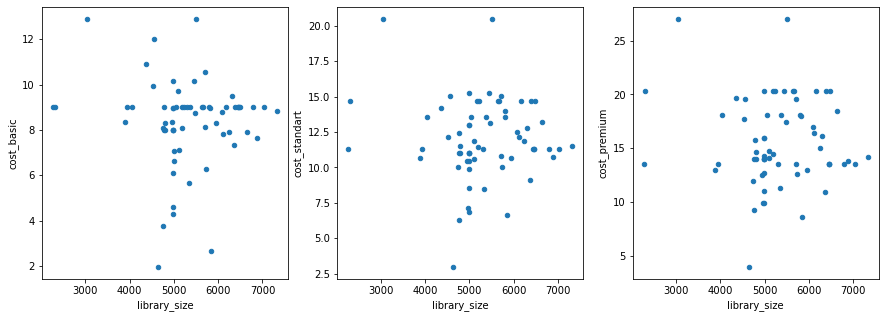

In [24]:
# Scatter plot that displays the dependance of cost on library size
fig, axes = plt.subplots(1, 3, figsize=(15,5))

data.sort_values(by = 'library_size').plot(x='library_size', y='cost_basic', kind='scatter', ax=axes[0])
data.sort_values(by = 'library_size').plot(x='library_size', y='cost_standart', kind='scatter', ax = axes[1])
data.sort_values(by = 'library_size').plot(x='library_size', y='cost_premium', kind='scatter', ax = axes[2])


Due to scatter plots there's no dependance of costs on library sizes

<AxesSubplot:xlabel='library_size', ylabel='cost_premium'>

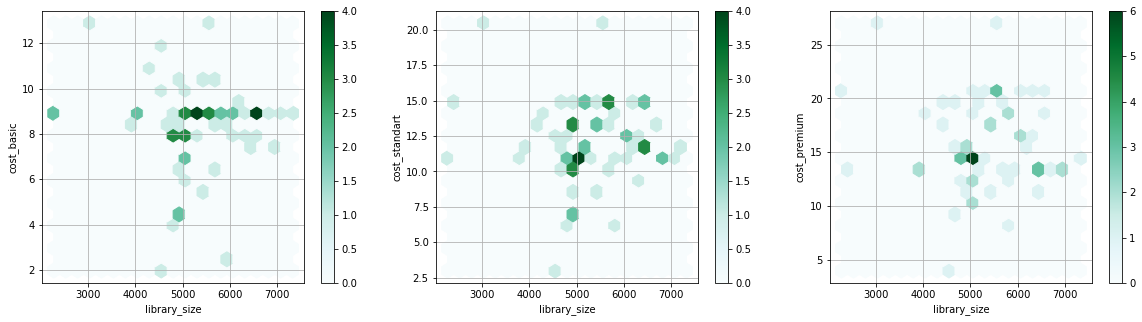

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))


data.plot(x='library_size', y='cost_basic', kind='hexbin', gridsize=20, sharex=False, grid=True, ax=axes[0]) 
data.plot(x='library_size', y='cost_standart', kind='hexbin', gridsize=20, sharex=False, grid=True, ax=axes[1]) 
data.plot(x='library_size', y='cost_premium', kind='hexbin', gridsize=20, sharex=False, grid=True, ax=axes[2]) 


In [26]:
list_of_plans = ['cost_basic', 'cost_standart', 'cost_premium']

for i in list_of_plans:
    print('Correlation between library_size and', i, ':',  data['library_size'].corr(data[i]))


Correlation between library_size and cost_basic : -0.06287685725178407
Correlation between library_size and cost_standart : -0.055199879566078504
Correlation between library_size and cost_premium : -0.07152105913727333


Correlation coefficient is almost 0. That means that there's no correlation between this factors.

array([[<AxesSubplot:xlabel='library_size', ylabel='library_size'>,
        <AxesSubplot:xlabel='number_of_tv_shows', ylabel='library_size'>,
        <AxesSubplot:xlabel='number_of_movies', ylabel='library_size'>,
        <AxesSubplot:xlabel='cost_basic', ylabel='library_size'>,
        <AxesSubplot:xlabel='cost_standart', ylabel='library_size'>,
        <AxesSubplot:xlabel='cost_premium', ylabel='library_size'>,
        <AxesSubplot:xlabel='mean_for_all_plans', ylabel='library_size'>],
       [<AxesSubplot:xlabel='library_size', ylabel='number_of_tv_shows'>,
        <AxesSubplot:xlabel='number_of_tv_shows', ylabel='number_of_tv_shows'>,
        <AxesSubplot:xlabel='number_of_movies', ylabel='number_of_tv_shows'>,
        <AxesSubplot:xlabel='cost_basic', ylabel='number_of_tv_shows'>,
        <AxesSubplot:xlabel='cost_standart', ylabel='number_of_tv_shows'>,
        <AxesSubplot:xlabel='cost_premium', ylabel='number_of_tv_shows'>,
        <AxesSubplot:xlabel='mean_for_all_plans', ylabe

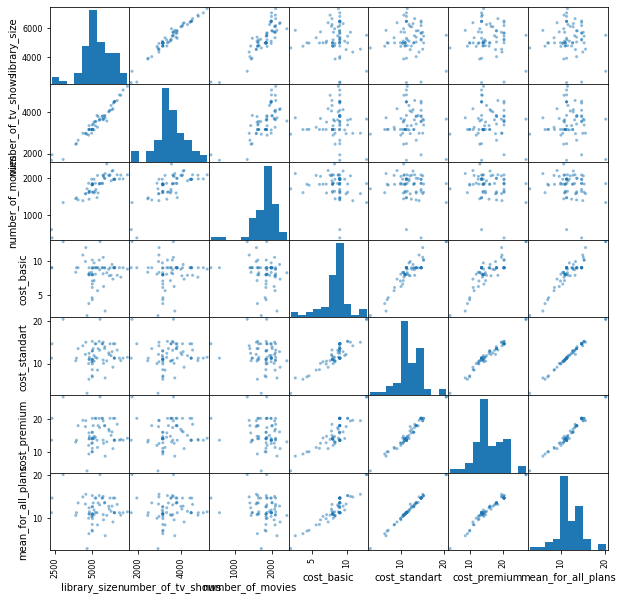

In [27]:
# Make scatter matrix
pd.plotting.scatter_matrix(data, figsize=(10, 10)) 


There's a correlation only between different subscription plans

---

## Correlation between subscription fee and GDP

I got a dataset with GDP information from 1990 to 2019.

dataset from: https://www.kaggle.com/nitishabharathi/gdp-per-capita-all-countries

In [28]:
countries = pd.read_csv('/Users/irinasaahmetova/Downloads/GDP.csv')
countries.head()

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN


In [29]:
# Keep only information about GDP of 2018
countries = countries[['Country ', '2018']]

In [30]:
# Rename the columns
countries.columns = ['country', 'gdp_2018']

In [31]:
# Merge two datasets
new_data = data.merge(countries, on='country')

Correlation between library_size and cost_basic : 0.5325068722503078
Correlation between library_size and cost_standart : 0.6338288957854388
Correlation between library_size and cost_premium : 0.6808110876077305


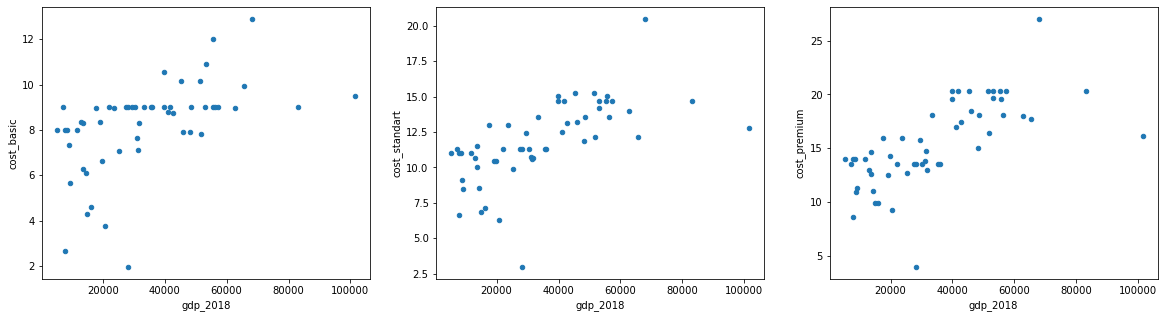

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

# Display scratter plot to see the dependance of cost on GDP per capita:
new_data.sort_values(by = 'gdp_2018').plot(x='gdp_2018', y='cost_basic', kind='scatter', ax=axes[0])
new_data.sort_values(by = 'gdp_2018').plot(x='gdp_2018', y='cost_standart', kind='scatter', ax = axes[1])
new_data.sort_values(by = 'gdp_2018').plot(x='gdp_2018', y='cost_premium', kind='scatter', ax = axes[2])

# Display the correlation coefficient 
for i in list_of_plans:
    print('Correlation between library_size and', i, ':',  new_data['gdp_2018'].corr(new_data[i]))

Yes, we use GDP for 2018 year and a lot has changed from that time, but still we see correlation between GDP and subscription fee, however, it's not really strong. So, we need more data to understand what the subscription price depends on.

---

## Cost per title

Find the cost per one element of library:

In [33]:
data['cost_per_title_basic'] = data['cost_basic'] / data['library_size']
data['cost_per_title_standart'] = data['cost_standart'] / data['library_size']
data['cost_per_title_premium'] = data['cost_premium'] / data['library_size']

### The 10 most cost-effective countries:

<AxesSubplot:xlabel='country'>

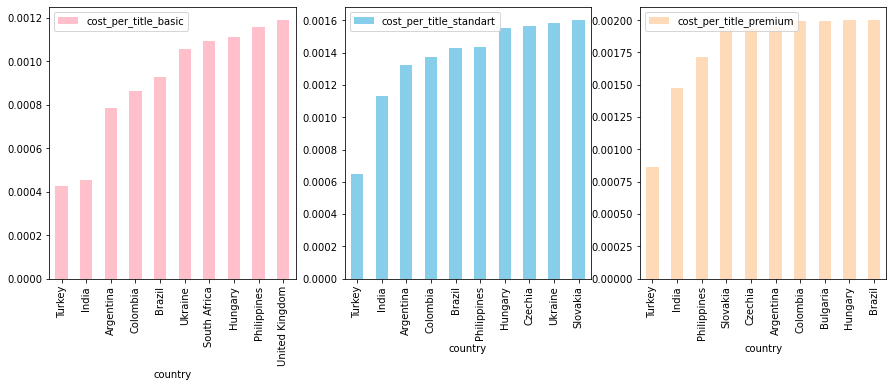

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

data.sort_values(by='cost_per_title_basic').head(10).plot(x='country', y = 'cost_per_title_basic', kind = 'bar', ax = axes[0], color = 'pink')
data.sort_values(by='cost_per_title_standart').head(10).plot(x='country', y = 'cost_per_title_standart', kind = 'bar', ax = axes[1], color = 'skyblue')
data.sort_values(by='cost_per_title_premium').head(10).plot(x='country', y = 'cost_per_title_premium', kind = 'bar', ax = axes[2], color='peachpuff')



Maybe we should all download the VPN and start watching Netflix from Turkey, it seems really effective

### The 10 least cost-effective countries:

<AxesSubplot:xlabel='country'>

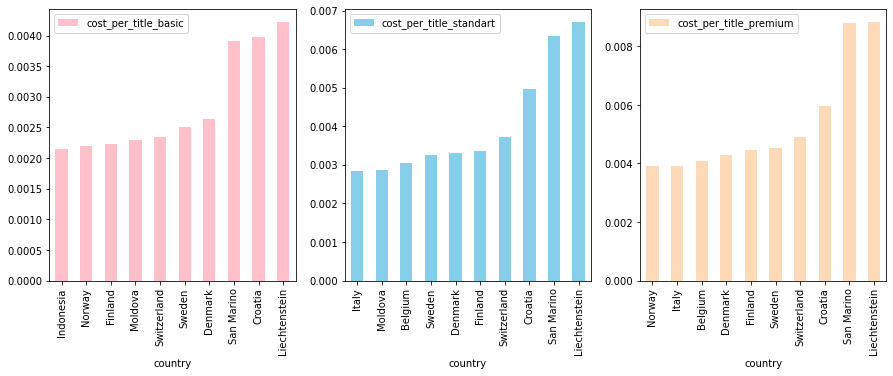

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

data.sort_values(by='cost_per_title_basic').tail(10).plot(x='country', y = 'cost_per_title_basic', kind = 'bar', ax = axes[0], color = 'pink')
data.sort_values(by='cost_per_title_standart').tail(10).plot(x='country', y = 'cost_per_title_standart', kind = 'bar', ax = axes[1], color = 'skyblue')
data.sort_values(by='cost_per_title_premium').tail(10).plot(x='country', y = 'cost_per_title_premium', kind = 'bar', ax = axes[2], color='peachpuff')



The least cost-effetive countries are diverse, but mostly it's European countries.